In [40]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([[0.245,0],
                    [0.247,0],
                    [0.285,1],
                    [0.299,1],
                    [0.327,1],
                    [0.347,1],
                    [0.356,0],
                    [0.36,1],
                    [0.363,0],
                    [0.364,1],
                    [0.398,0],
                    [0.4,1],
                    [0.409,0],
                    [0.421,1],
                    [0.432,0],
                    [0.473,1],
                    [0.509,1],
                    [0.529,1],
                    [0.561,0],
                    [0.569,0],
                    [0.594,1],
                    [0.638,1],
                    [0.656,1],
                    [0.816,1],
                    [0.853,1],
                    [0.938,1],
                    [1.036,1],
                    [1.045,1],
                    ])


In [95]:
# preprocessing dataset
x = dataset[:,0]
y = dataset[:,1]

In [42]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [43]:
# value of predictation
def predict(theta0, theta1, x):
  h = theta0+ theta1*x
  return sigmoid(h)


In [44]:
# Cost_function
def cost_function(theta0, theta1,x, y_true):
  epsilon = 1e-15
  m = len(x)
  y_pred = predict(theta0, theta1, x)
  J = (-1/m)*np.sum(y_pred*(np.log(y_pred+epsilon))+(1-y_true)*np.log(1-y_pred+epsilon))
  return J

In [45]:
# Calculating gradient_descent
def gradient_descent(theta0, theta1, x, y, learning_rate,epochs):
  m = len(x)
  for i in range(epochs):
    gradient0 = (1/m)*np.sum(predict(theta0,theta1,x)-y)
    gradient1 = (1/m)*np.sum((predict(theta0,theta1,x) -y )*x)
    n_theta0 = theta0 - learning_rate*gradient0
    n_theta1 = theta1 - learning_rate*gradient1
    cost = cost_function(theta0, theta1, x,y)
  return n_theta0, n_theta1, cost

In [46]:
# Initial parameters
np.random.seed()
theta0 = np.random.rand()
theta1 = np.random.rand()
learning_rate = 1e-4
epochs = 10000

In [47]:
# Value of theta and cost
t0,t1,cost = gradient_descent(theta0, theta1, x, y, learning_rate,epochs)
print(t0,t1,cost)


0.6826268261668457 0.7580707228563214 0.6379592121556829


In [48]:
# Predict the presence or absence of the burrowing wolf spider
def predictation(t0,t1,x):
  value = predict(t0,t1,x)
  if value >= 0.5:
    print('present')
  else: print('absent')

In [49]:
predictation(t0,t1,0.56)

present


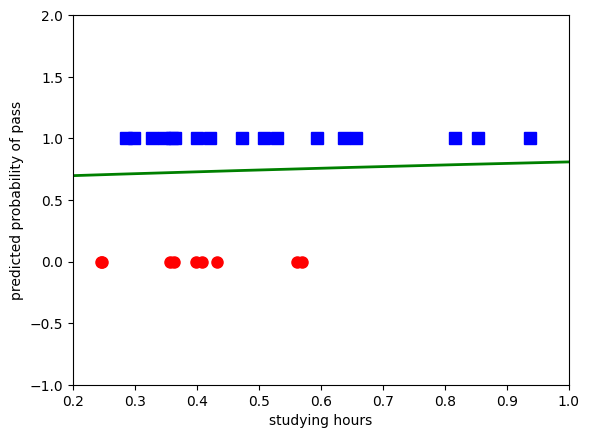

In [99]:
#Visualizing the dataset being classified

X= np.expand_dims(x,0)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.axis([0.2, 1, -1, 2])
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)


xx = np.linspace(0, 6, 1000)

threshold = -t0/t1
yy = sigmoid(t0 +t1*xx)
plt.axis([0.2, 1, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()